In [38]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)


In [39]:
data = pd.read_csv('WMT1.csv')
data_17 = data[data.Year == 2017]
# calculate the mean std

mean_17 = data_17.groupby('Week_Number')['Return'].mean().tolist()
std_17 = data_17.groupby('Week_Number')['Return'].std().tolist()
X = []
Y = []
for i in range(len(mean_17)):
    X.append([mean_17[i],std_17[i]])
scaler = StandardScaler().fit(X)
X = scaler.transform (X)
weekly_17 = data_17.groupby('Week_Number')['label'] # select Friday's data
for i,j in weekly_17:
    Y.append(j.tolist()[0])

In [40]:
data_18 = data[data.Year == 2018]
# calculate the mean std

mean_18 = data_18.groupby('Week_Number')['Return'].mean().tolist()[0:-1]
std_18 = data_18.groupby('Week_Number')['Return'].std().tolist()[0:-1]

X_18 = []
Y_18 = []
for i in range(len(mean_18)):
    X_18.append([mean_18[i],std_18[i]])
scaler = StandardScaler().fit(X_18)
X_18 = scaler.transform (X_18)
weekly_18 = data_18.groupby('Week_Number')['label'] # select Friday's data
for i,j in weekly_18:
    Y_18.append(j.tolist()[0])

In [41]:
scaler = StandardScaler().fit(X)
X = scaler.transform (X)

log_reg_classifier = LogisticRegression ()
log_reg_classifier.fit (X,Y)

pred_k_1 = log_reg_classifier.predict(X_18)
accuracy = np.mean(pred_k_1 == Y_18[0:-1])

print(accuracy)

0.8653846153846154


In [42]:
a = log_reg_classifier.coef_
print(a)
print(log_reg_classifier.intercept_)
print('the equation is y = '+str(log_reg_classifier.coef_[0][0])+'*x1 '+str(log_reg_classifier.coef_[0][1])+'*x2 '+str(log_reg_classifier.intercept_[0])
     )

[[-3.06781103 -0.28678449]]
[-1.28372429]
the equation is y = -3.067811034432674*x1 -0.2867844909420809*x2 -1.283724293681242


In [43]:
TP = 0
FP = 0
TN = 0
FN = 0
for j in range(len(pred_k_1)):
    if pred_k_1[j] == 'green' and Y_18[j] == 'green':
        TP+=1
    elif pred_k_1[j] == 'green' and Y_18[j] == 'red':
        FP+=1
    elif pred_k_1[j] == 'red' and Y_18[j] == 'red':
        TN+=1
    elif pred_k_1[j] == 'red' and Y_18[j] == 'green':
        FN+=1
dic2 = {'TP':TP,'FP':FP,'TN':TN,'FN' : FN,'accuracy':(TP+TN)/len(pred_k_1),'TPR' :TP/(TP+FN),'TNR': TN/(TN+FP)}
result1 = pd.DataFrame(dic1,index = ['result'])

print(result1)#question2

        TP  FP  TN  FN  accuracy  TPR       TNR
result  31   7  14   0  0.865385  1.0  0.666667


In [44]:
print('recall :', TP/(TP+FN))
print('specificity :',TN/(TN+FP))

recall : 1.0
specificity : 0.6666666666666666


In [45]:
weekly_18= data[(data.Year == 2018) & (data.Weekday == 'Friday')]['Adj Close'].tolist() # select Friday's data

previous_shares = 0
previous_balance = 100
weekly_balance = []
for i in range(len(pred_k)-1):
    if  pred_k[i+1]== 'green':
        if previous_shares == 0:
            previous_shares = previous_balance / weekly_18[i]
            previous_balance = previous_shares*weekly_18[i]
        else:
            previous_shares = previous_shares
            previous_balance = previous_shares*weekly_18[i]
    elif pred_k[i+1] == 'red':
        if previous_shares != 0:
            previous_balance = previous_shares*weekly_18[i]
            previous_shares = 0
        else:
            previous_shares = previous_shares
            previous_balance = previous_balance
    weekly_balance.append(previous_balance)

print(weekly_balance)

[100.0, 100.7396449704142, 104.4484361792054, 108.24175824175823, 108.24175824175823, 108.24175824175825, 114.13097656176873, 114.13097656176873, 114.13097656176872, 114.74312125131335, 115.32805951021159, 115.32805951021159, 117.03199538083773, 117.03199538083773, 118.33409974318718, 118.74905607844138, 119.07815937881543, 114.15591871235155, 114.15591871235155, 112.55813529623266, 113.27143146414289, 115.14026742406764, 114.24151425250078, 115.76796805182866, 116.909241920485, 115.35425627444073, 115.35425627444073, 115.82166715673497, 115.91789880897201, 117.85627923260402, 119.29975401615977, 129.44531963772303, 125.60980092713204, 125.60980092713203, 125.56895221138338, 123.94861982001983, 125.66426588146359, 123.0499480735493, 123.04994807354932, 125.03705604444411, 128.1204994475568, 130.47762062682511, 133.64328918735413, 139.20719150585964, 128.8331174784984, 128.8331174784984, 128.8331174784984, 123.62330747085454, 123.62330747085454, 117.28008386258294, 117.28008386258294]


In [46]:
share_1 = 100/weekly_18[0]
balance_1 = share_1 * weekly_18[-1]
print('buy_and_hold amount :', balance_1)
print('base on label amount :', weekly_balance[-1])

buy_and_hold amount : 94.18850380388842
base on label amount : 117.28008386258294


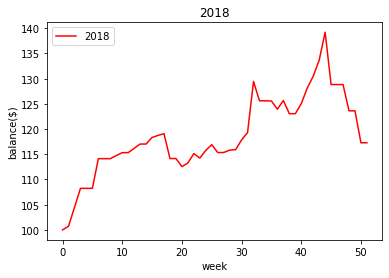

In [47]:
data_18 = data[(data.Year == 2018) & (data.Weekday == 'Friday')]  # select Friday's data
plt.plot(data_18['Week_Number'], weekly_balance, label=2018,color = 'red')
plt.xlabel('week')
plt.ylabel('balance($)')
plt.title(2018)
plt.legend()

plt.show()